### 차원 축소

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PCA(Principal Component Analysis)
- 데이터를 가장 잘 설명할 수 있는, 분산을 최대화하는 방향을 ㅗ축을 결정

In [57]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


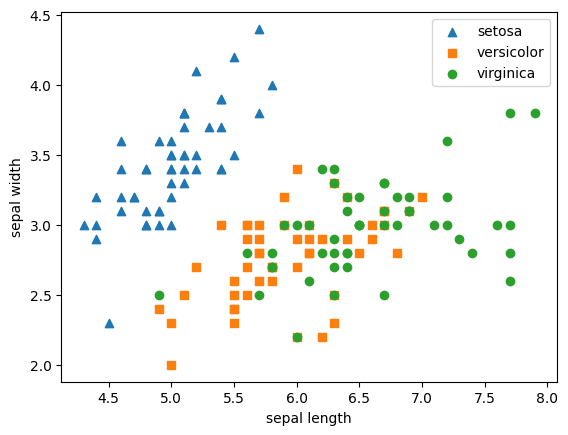

In [58]:
markers = ['^', 's', 'o']

for i,marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [59]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = iris_df.iloc[:,:-1]

pca.fit(X)
iris_pca = pca.transform(X)
iris_pca

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1','pca_col2'])
iris_pca_df['target'] = iris_data.target

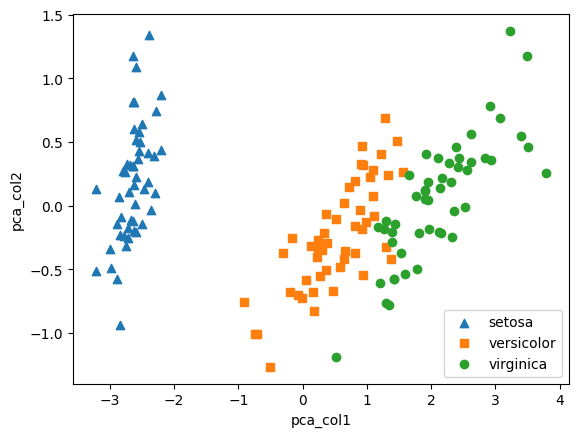

In [60]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [61]:
#PCA를 통해 생성된 주성분들이 실제 데이터의 총 분산에 얼마만큼의 비율을 나타내는지
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [62]:
# 원본 데이터 학습 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=100)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)
print('원본 데이터 평가: ', np.mean(scores))

원본 데이터 평가:  0.9733333333333334


c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# PCA 데이터 학습 및 평가
lr_clf = LogisticRegression(max_iter=100)
scores = cross_val_score(lr_clf, iris_pca_df[['pca_col1','pca_col2']], iris_pca_df['target'], cv=5)
print('PCA 데이터 평가:', np.mean(scores))

PCA 데이터 평가: 0.96


### PCA 과일 데이터

In [64]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape # 300개의 이미지 * 100행 * 100행

(300, 100, 100)

In [65]:
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N/10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < N:
                ax[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            ax[i,j].axis('off')
               
    plt.show()

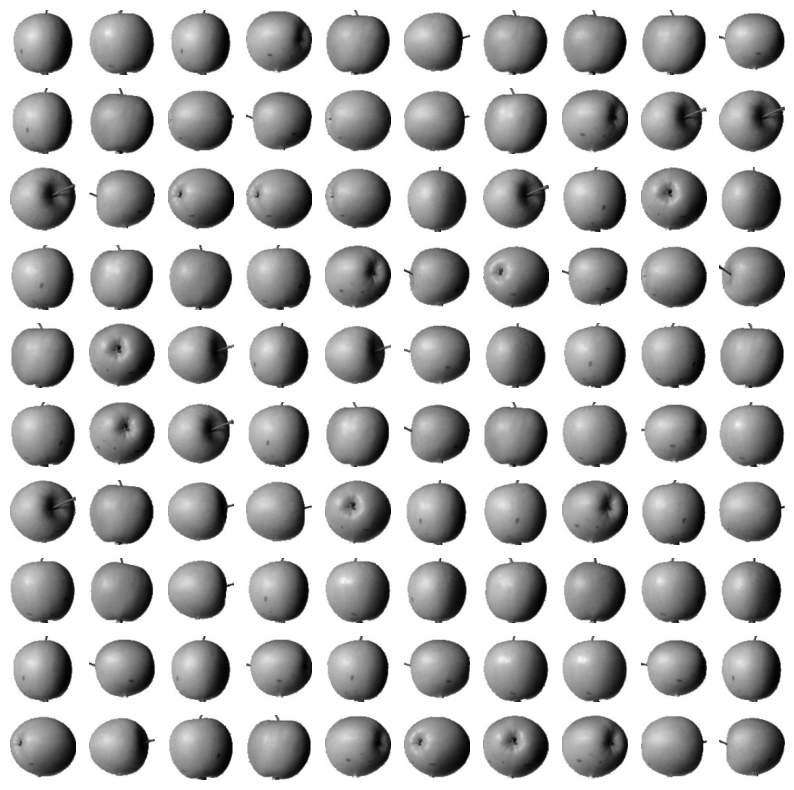

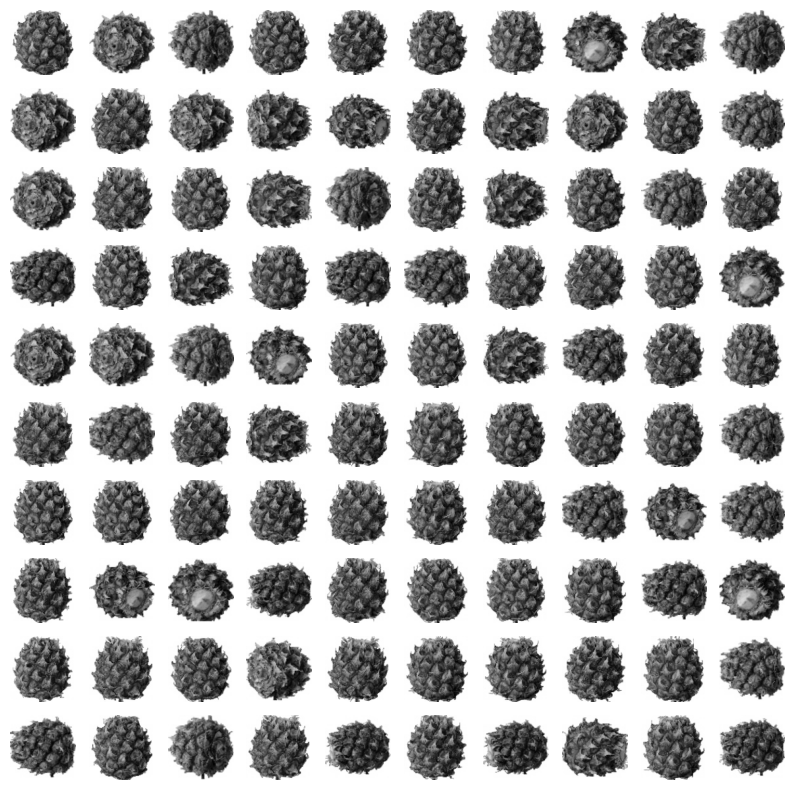

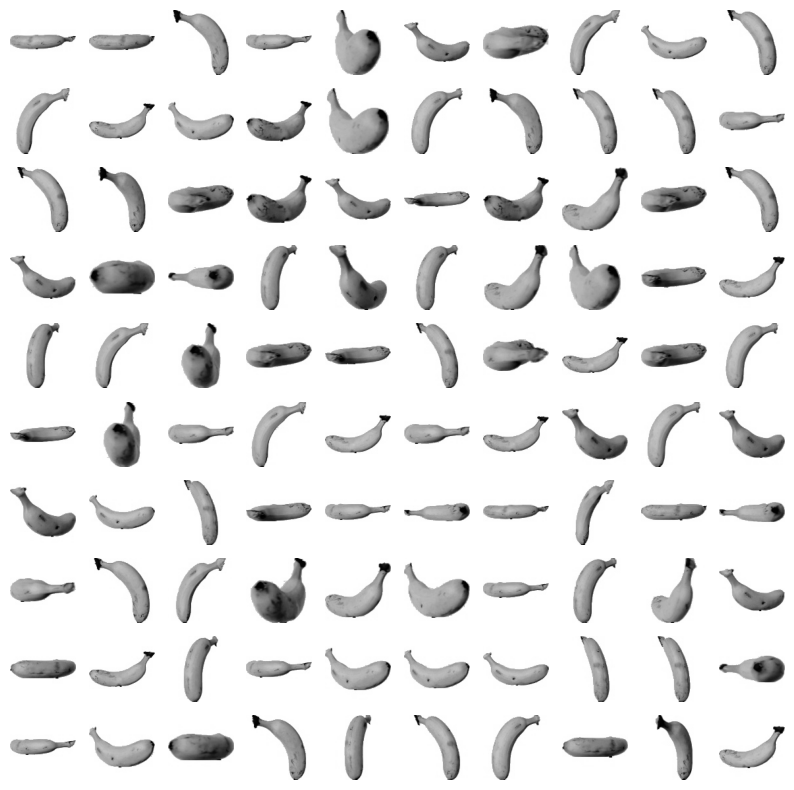

In [66]:
draw_fruits(fruits[:100])
draw_fruits(fruits[100:200])
draw_fruits(fruits[200:])

In [67]:
# 1차원으로 펼치기
fruist_1d=fruits.reshape(300, 100*100)
fruist_1d.shape

(300, 10000)

In [68]:
#PCA 주성분 50개로 차원 축소
pca = PCA(n_components=50)
pca.fit(fruist_1d)

PCA(n_components=50)

In [69]:
pca.components_.shape

(50, 10000)

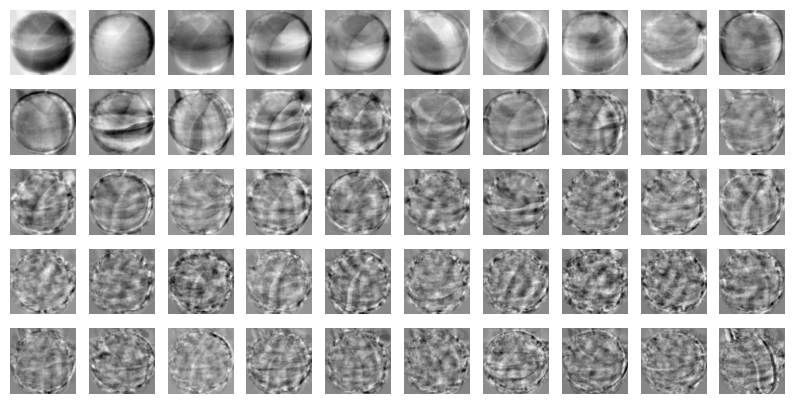

In [70]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [71]:
fruist_pca = pca.transform(fruist_1d)
fruist_pca.shape

(300, 50)

In [72]:
# 
np.save('./data/fruits_pca.npy', fruist_pca)

In [73]:
fruist_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511201
 0.00486382 0.00480347 0.00447835 0.00437319 0.00408039 0.00389474
 0.00372441 0.00359276 0.00331415 0.00317809 0.00304335 0.00303746
 0.00288899 0.00275749 0.00264712 0.00255898 0.00252175 0.00247253
 0.0023942  0.00230544 0.00221128 0.00216525 0.00213504 0.00195049
 0.00191828 0.00190984 0.00183345 0.00178434 0.00171053 0.00166593
 0.00162384 0.00160891]
0.9214408247167072


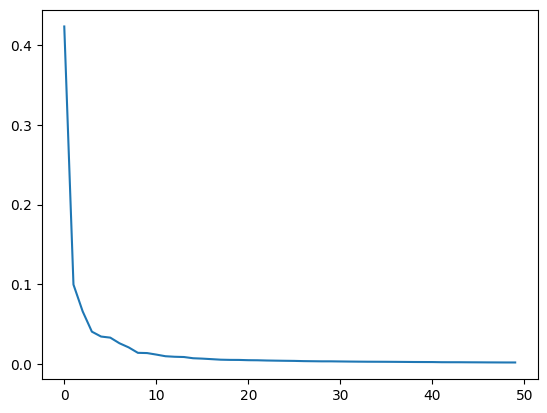

In [74]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [75]:
# 라벨 데이터 생성성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [76]:
#원본 데이터 교차검증 점수 확인

# cross_val_score : 각 cv의 점수 반환
# cross_validate : 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표 여러 개 사용 가능)

from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)

result = cross_validate(lr_clf, fruist_1d, target, cv=3)
result


{'fit_time': array([0.25000024, 0.24649   , 0.24624777]),
 'score_time': array([0.00299811, 0.00351548, 0.00252962]),
 'test_score': array([1.  , 1.  , 0.99])}

In [77]:
# PCA 데이터 교차검증 점수 확인
result_pca = cross_validate(lr_clf, fruist_pca, target, cv=3)
result_pca

{'fit_time': array([0.00788379, 0.01115251, 0.00400043]),
 'score_time': array([0.00052691, 0.        , 0.        ]),
 'test_score': array([1.  , 1.  , 0.99])}

In [78]:
#원본 데이터 복구
fruits_inverse = pca.inverse_transform(fruist_pca)
fruits_inverse.shape

(300, 10000)

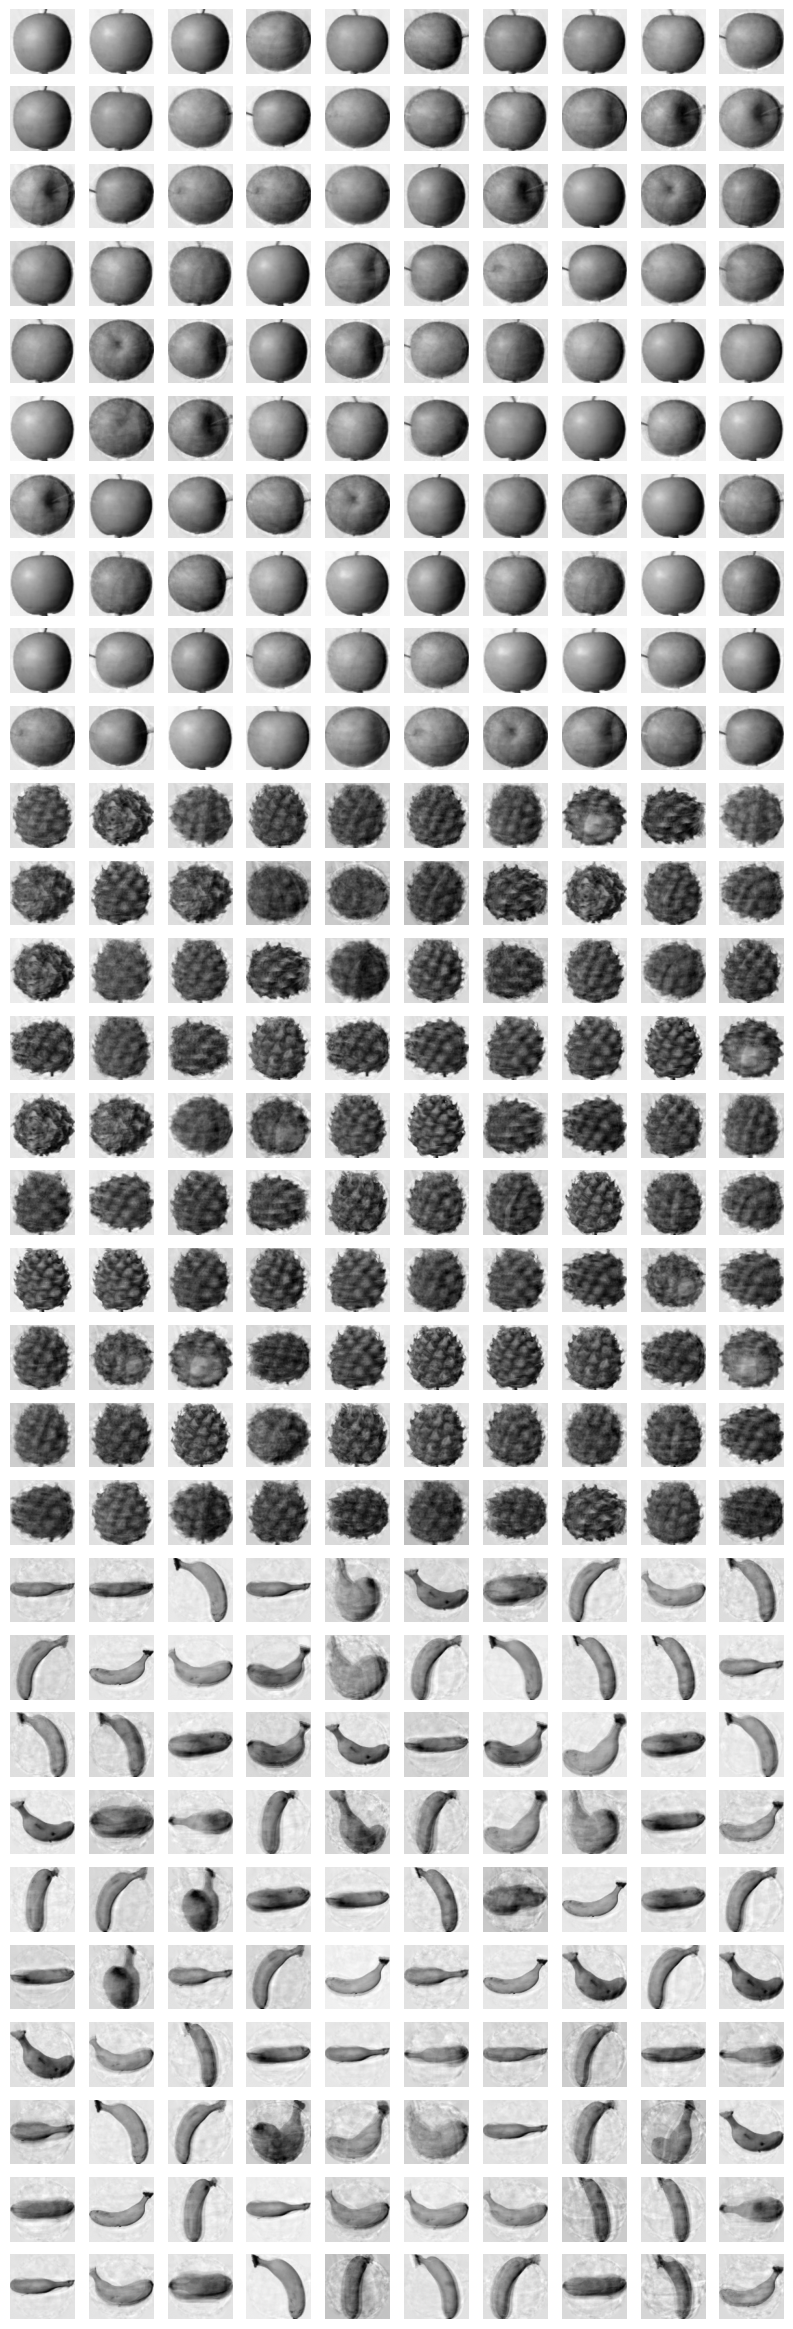

In [79]:
draw_fruits(fruits_inverse.reshape(-1,100,100))

### LDA (Linear Discriminant Analysis)
- 타겟 클래스 간 분리를 최대로 하는 축으로 결정


In [80]:
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data.data)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled, iris_data.target)

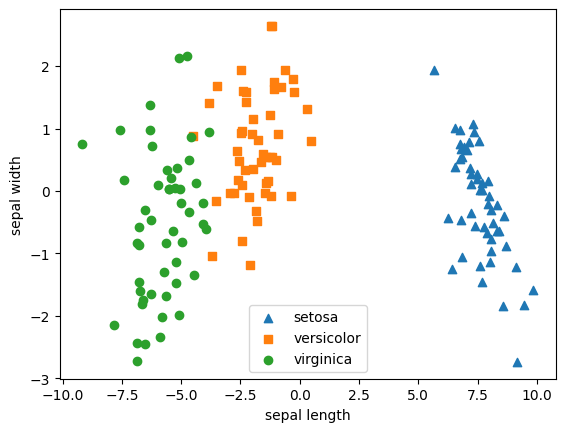

In [82]:
iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1','lda_col2'])
iris_lda_df['target'] = iris_data.target

markers = ['^', 's', 'o']

for i,marker in enumerate(markers):
    x = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### LLE
- 데이터 포인트를 근접한 이웃과 선형 결합으로 이를 유지하도록 저차원 공간에 매핑

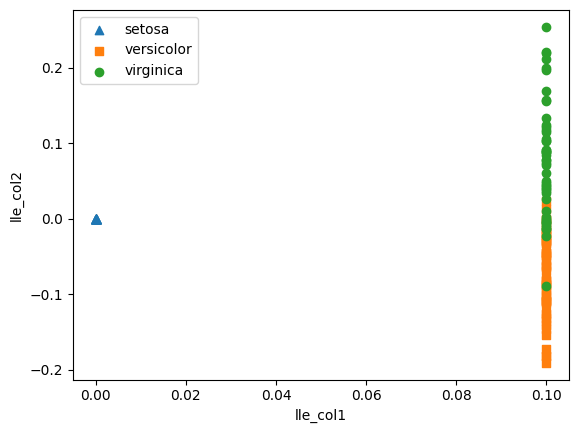

In [85]:
from sklearn.manifold import LocallyLinearEmbedding

iris_data = load_iris()

# LLE 변환
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
iris_lle = lle.fit_transform(iris_data.data)

# 시각화
iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_data.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [86]:
result = cross_validate(lr_clf, iris_lle_df[['lle_col1', 'lle_col2']],
                        iris_lle_df['target'], cv=3)
result

{'fit_time': array([0.00500035, 0.00433517, 0.00400019]),
 'score_time': array([0.00200105, 0.00200224, 0.00099993]),
 'test_score': array([0.94, 0.9 , 0.9 ])}

In [88]:
print(lle.n_neighbors)  # 이웃수
print(lle.n_components) # 축소된 차원수
print(lle.reconstruction_error_)    # 재구성 오차

10
2
5.1168977786832e-07
